# Introduction

Digitization of machine-printed or handwritten text documents has always been
more popular with the advancements in computing and technology. Humans
have tried to automatize their work by replacing themselves with machines.
Pattern recognition is an important technique that enhances the recognition of
data regularities and patterns. Letter recognition is an application of ML that can
be used for research, computer vision, and pattern recognition. A device capable
of handwriting recognition is to detect characters in paper documents, pictures,
and other sources and converts them into digital formats. Experimental results
show that the application of deep learning algorithms has achieved good results
in training model feature extraction and recognition accuracy.

#  Problem Statement 

The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.
It contains the 26 English alphabets as classes, so it's a
multi-class classification problem with 26 classes.
Here we identify each of many black-and-white rectangular pixels displayed as
one of the 26 capital letters in the English alphabet. The character images were
based on 20 different fonts and each letter within these 20 fonts was randomly
distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted
into 16 primitive numerical attributes which were then scaled to fit into a range of
integer values from 0 through 15. In this project, character recognition is done
using Machine Learning and Deep Learning models

# Data Set

Data Source:

For the project, the data set is taken from the UCI repository. You can access the
data dictionary of the letter recognition data set.
https://archive-beta.ics.uci.edu/ml/datasets/letter+recognition

Data Description: 

The dataset consists of 20000 instances and 17 attributes (Letter + 16
features)
Each row in the data set represents an image of a handwritten alphabet. Using
some basic image processing, the images are converted into pixels. Each pixel
contains numeric values. Using the pixelated images, 16 features are derived for
each image.

# Importing Required Libraries

In [272]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import math
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt #for plotting
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import StandardScaler
from math import sqrt
# importing mean() 
from statistics import mean
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_random_state
from sklearn.preprocessing import LabelEncoder
from abc import ABC,abstractmethod
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_absolute_error,mean_squared_error,r2_score,make_scorer
from abc import ABC,abstractmethod
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier
## import the scikit-learn models ##
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from typing import Dict, Any
from sklearn.pipeline import Pipeline
from scipy import stats
from collections import Counter
from typing import Union, Tuple
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt


### Loading the Dataset

In [261]:
letter_df = pd.read_csv('letter-recognition.csv',header=0,)# header 0 means the first row is name of the coloumn 

# View sample data
letter_df.head(10) 

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [4]:
letter_df.shape


(20000, 17)

In [5]:
letter_df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [262]:
feature_names = letter_df.columns
feature_names

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

# Exploratory Data Analysis

In [263]:
#reindexing the column names to remove extra spaces
letter_df.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']
print(letter_df.columns)

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')


In [266]:
order = list(np.sort(letter_df['letter'].unique()))
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


The below graph is plotted to represent the number of observations of each
letter across the datasets.

/Users/deepikasundaram/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='letter', ylabel='count'>

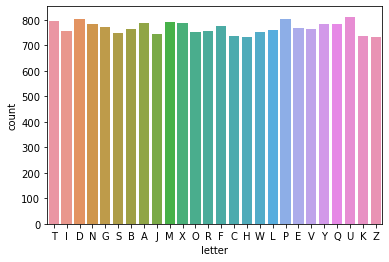

In [10]:
# Plot distribution
sns.countplot(letter_df['letter'])

This bar plot represents the comparisons between discrete categories. This
shows how the categorical attribute letter varies with numerical attribute xbox.
For each letter the value of xbox varies and it is plotted in bar graph to easily
understand the variation in values.

<AxesSubplot:xlabel='letter', ylabel='xbox'>

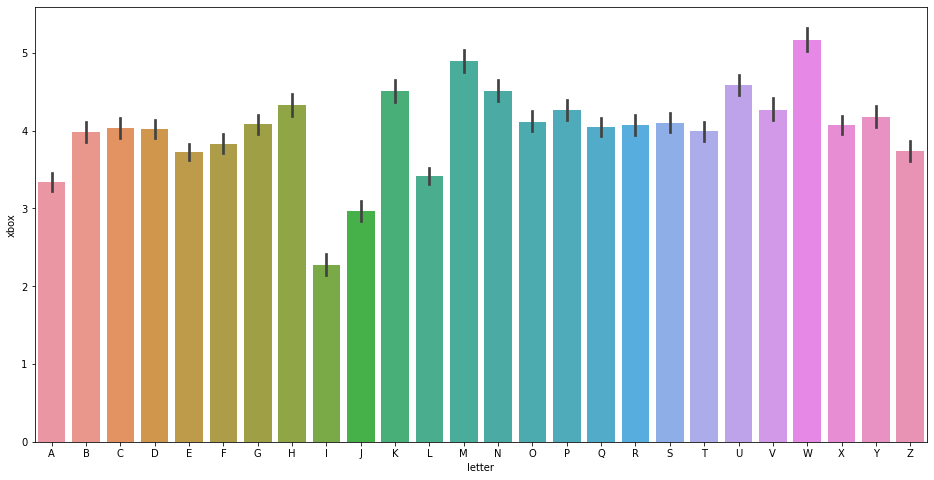

In [11]:
plt.figure(figsize=(16, 8))
sns.barplot(x='letter', y='xbox', 
            data=letter_df, 
            order=order)

This bar plot presents the categorical attribute letter with numerical attribute
width proportional to the values that they represent. The relationship between
letter and width is represented. For each letter the value of width is different, and
it can be used to identify a letter.

<AxesSubplot:xlabel='letter', ylabel='width'>

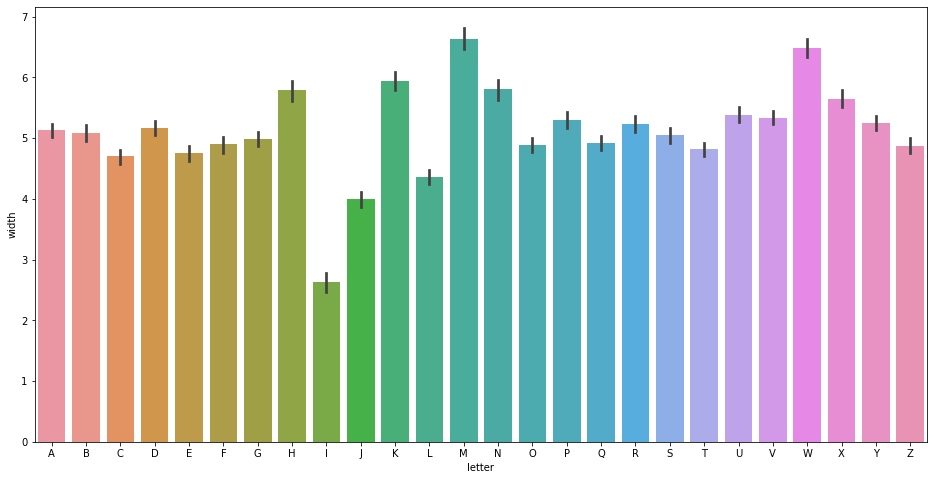

In [12]:
plt.figure(figsize=(16, 8))
sns.barplot(x='letter', y='width', 
            data=letter_df, 
            order=order)

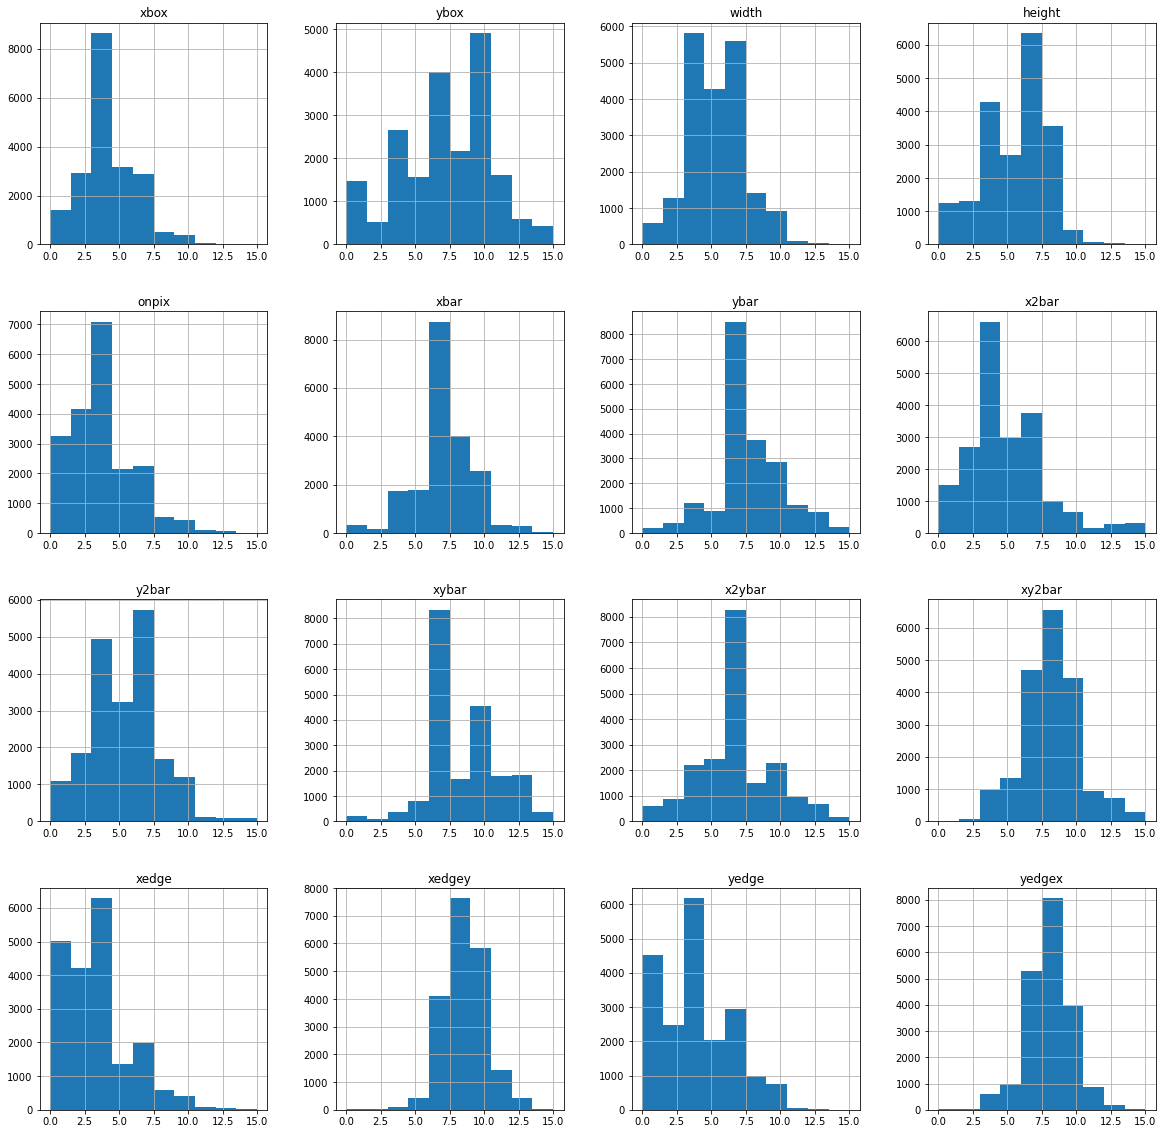

In [13]:
p = letter_df.hist(figsize = (20,20))

This histogram plot represents the distribution of all features within the dataset,
with one feature per plot. This graph is plotted to see the skewness of the data.
From the below plot, we can see none of the data are skewed.

In [14]:
letter_means = letter_df.groupby('letter').mean()
letter_means.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


<AxesSubplot:ylabel='letter'>

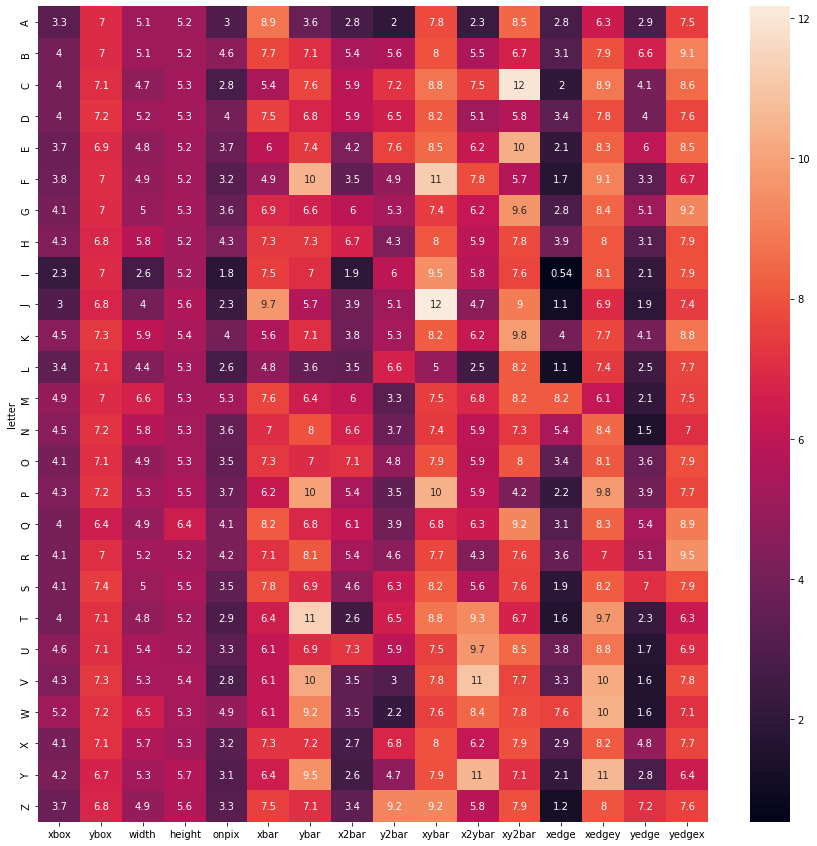

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(letter_means, annot = True)

This heatmap shows the aggregated visualization of attribute Letter with other
attributes. The mean values of all attributes are plotted against the attribute letter.
From the below plot, we can see that comparing all the mean height values
Letter Q has the highest height value. Similarly Letter M has the highest width
value compared with the mean value of all attributes. This heatmap is helpful in
identifying the Letter with highest mean value of all the attributes.

# Data Preprocessing

In [16]:
letter_df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


## Checking for missing/null values

In [249]:
letter_df.isna().sum()


letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [247]:
letter_df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

Since there are no null or missing values in the dataset, imputation is not required for this data.

## Encoding Categorical Columns

In [45]:
labelencoder = LabelEncoder()
letter_df['letter'] = labelencoder.fit_transform(letter_df['letter']) 

In this dataset, the column “letter” is a categorical variable. To handle this, we converted categorical variable to numerical variable using Label Encoder.

## Defining input features and target variable

In [46]:
X=letter_df.iloc[:,1:].values
y=letter_df.iloc[:,0].values

In this dataset, the target variable is the column "Letter". 
So, we have defined the target variable y with one column and 
all the other columns are defined as input features X.

## Scaling the Dataset

In [47]:
sc = StandardScaler()
X = sc.fit_transform(X)

Input features in this dataset are in various dimensions and scales which might affect the modeling and it leads to a biased outcome in terms of error and accuracy rates. Hence, we are scaling the data before modeling using Standard Scaler

In [48]:
X.shape,y.shape

((20000, 16), (20000,))

## Splitting the Dataset

In [49]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, y, test_size = 0.2,random_state=42)

The dataset is divided into 80 % training data and 20 % test data where we fit the model on the training data and predict or evaluate on the test data.

# Building Multi-Class Classification Models

Here we are going to build few multi-class classification models to classify the 26 English letters from A to Z.

# SVM Classifier

In [77]:
def projection_simplex(v, z=1):
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w

class MulticlassSVM(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1, max_iter=50, tol=0.05,
                 random_state=None, verbose=0):
        self.C = C
        self.max_iter = max_iter
        self.tol = tol,
        self.random_state = random_state
        self.verbose = verbose
        
    def _partial_gradient(self, X, y, i):
        # Partial gradient for the ith sample.
        g = np.dot(X[i], self.coef_.T) + 1
        g[y[i]] -= 1
        return g

    def _violation(self, g, y, i):
        # Optimality violation for the ith sample.
        smallest = np.inf
        for k in range(g.shape[0]):
            if k == y[i] and self.dual_coef_[k, i] >= self.C:
                continue
            elif k != y[i] and self.dual_coef_[k, i] >= 0:
                continue
            smallest = min(smallest, g[k])
        return g.max() - smallest

    def _solve_subproblem(self, g, y, norms, i):
        # Prepare inputs to the projection.
        Ci = np.zeros(g.shape[0])
        Ci[y[i]] = self.C
        beta_hat = norms[i] * (Ci - self.dual_coef_[:, i]) + g / norms[i]
        z = self.C * norms[i]
        # Compute projection onto the simplex.
        beta = projection_simplex(beta_hat, z)
        return Ci - self.dual_coef_[:, i] - beta / norms[i]

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Normalize labels.
        self._label_encoder = LabelEncoder()
        y = self._label_encoder.fit_transform(y)
        # Initialize primal and dual coefficients.
        n_classes = len(self._label_encoder.classes_)
        self.dual_coef_ = np.zeros((n_classes, n_samples), dtype=np.float64)
        self.coef_ = np.zeros((n_classes, n_features))
        # Pre-compute norms.
        norms = np.sqrt(np.sum(X ** 2, axis=1))
        # Shuffle sample indices.
        rs = check_random_state(self.random_state)
        ind = np.arange(n_samples)
        rs.shuffle(ind)
        violation_init = None
        for it in range(self.max_iter):
            violation_sum = 0
            for ii in range(n_samples):
                i = ind[ii]
                # All-zero samples can be safely ignored.
                if norms[i] == 0:
                    continue
                g = self._partial_gradient(X, y, i)
                v = self._violation(g, y, i)
                violation_sum += v
                if v < 1e-12:
                    continue
                # Solve subproblem for the ith sample.
                delta = self._solve_subproblem(g, y, norms, i)
                # Update primal and dual coefficients.
                self.coef_ += (delta * X[i][:, np.newaxis]).T
                self.dual_coef_[:, i] += delta
            if it == 0:
                violation_init = violation_sum
            vratio = violation_sum / violation_init
            if self.verbose >= 1:
                print("iter", it + 1, "violation", round(vratio,4))
            if vratio < self.tol:
                if self.verbose >= 1:
                    print("Converged")
                break
        return self

    def predict(self, X):
        decision = np.dot(X, self.coef_.T)
        pred = decision.argmax(axis=1)
        return self._label_encoder.inverse_transform(pred)

In [78]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [79]:
def comp_confmat(actual, predicted):

    # extract the different classes
    classes = np.unique(actual)

    # initialize the confusion matrix
    confmat = np.zeros((len(classes), len(classes)))

    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):

           # count the number of instances in each combination of actual / predicted classes
           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat


In [80]:
multiSVMmodel = MulticlassSVM(C=0.1, tol=0.01, max_iter=100, random_state=0, verbose=1)
multiSVMmodel.fit(X, y)
print("Accuracy of SVM is ",round(multiSVMmodel.score(X, y),4))

iter 1 violation 1.0
iter 2 violation 0.7692
iter 3 violation 0.4776
iter 4 violation 0.3271
iter 5 violation 0.2389
iter 6 violation 0.1916
iter 7 violation 0.157
iter 8 violation 0.1309
iter 9 violation 0.1122
iter 10 violation 0.0975
iter 11 violation 0.086
iter 12 violation 0.0764
iter 13 violation 0.0685
iter 14 violation 0.0617
iter 15 violation 0.056
iter 16 violation 0.0516
iter 17 violation 0.0484
iter 18 violation 0.0447
iter 19 violation 0.042
iter 20 violation 0.0387
iter 21 violation 0.0362
iter 22 violation 0.0337
iter 23 violation 0.032
iter 24 violation 0.0303
iter 25 violation 0.0286
iter 26 violation 0.0271
iter 27 violation 0.0255
iter 28 violation 0.0242
iter 29 violation 0.023
iter 30 violation 0.022
iter 31 violation 0.0213
iter 32 violation 0.0202
iter 33 violation 0.0193
iter 34 violation 0.0186
iter 35 violation 0.018
iter 36 violation 0.0174
iter 37 violation 0.0167
iter 38 violation 0.0161
iter 39 violation 0.0155
iter 40 violation 0.015
iter 41 violation 0.0

In [81]:
ypred_SVM = multiSVMmodel.predict(Xtest)

In [82]:
lst_actual_class = Ytest
lst_predicted_class = ypred_SVM

# Class = Label A-Z
lst_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25' ]


# Compute multi-class confusion matrix
#arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)
# Temp store results
store_sens = [];
store_spec = [];
store_acc = [];
store_bal_acc = [];
store_prec = [];
store_fscore = [];
store_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]
    
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    x = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(x), 3)
    store_sens.append(sensitivity);
    store_spec.append(specificity);
    store_acc.append(accuracy);
    store_bal_acc.append(balanced_accuracy);
    store_prec.append(precision);
    store_fscore.append(f1Score);
    store_mcc.append(MCC);
    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Sensitivity: {0}".format(sensitivity));
    print("Specificity: {0}".format(specificity));
    print("Accuracy: {0}".format(accuracy));
    print("Balanced Accuracy: {0}".format(balanced_accuracy));
    
    print("Precision: {0}".format(precision));
    print("F1-Score: {0}".format(f1Score));
    print("MCC: {0}\n".format(MCC));

Print Class: 0
TP=134, FP=35, TN=3816, FN=15
Sensitivity: 0.899
Specificity: 0.991
Accuracy: 0.988
Balanced Accuracy: 0.945
Precision: 0.793
F1-Score: 0.843
MCC: 0.838

Print Class: 1
TP=115, FP=45, TN=3802, FN=38
Sensitivity: 0.752
Specificity: 0.988
Accuracy: 0.979
Balanced Accuracy: 0.87
Precision: 0.719
F1-Score: 0.735
MCC: 0.724

Print Class: 2
TP=99, FP=36, TN=3827, FN=38
Sensitivity: 0.723
Specificity: 0.991
Accuracy: 0.982
Balanced Accuracy: 0.857
Precision: 0.733
F1-Score: 0.728
MCC: 0.718

Print Class: 3
TP=131, FP=52, TN=3792, FN=25
Sensitivity: 0.84
Specificity: 0.986
Accuracy: 0.981
Balanced Accuracy: 0.913
Precision: 0.716
F1-Score: 0.773
MCC: 0.766

Print Class: 4
TP=116, FP=50, TN=3809, FN=25
Sensitivity: 0.823
Specificity: 0.987
Accuracy: 0.981
Balanced Accuracy: 0.905
Precision: 0.699
F1-Score: 0.756
MCC: 0.749

Print Class: 5
TP=92, FP=25, TN=3835, FN=48
Sensitivity: 0.657
Specificity: 0.994
Accuracy: 0.982
Balanced Accuracy: 0.826
Precision: 0.786
F1-Score: 0.716
MC

In [83]:
print("Overall Performance Prediction:");
print("Sensitivity: {0}%".format(round(mean(store_sens)*100, 4)));
print("Specificity: {0}%".format(round(mean(store_spec)*100, 4)));
print("Accuracy: {0}%".format(round(mean(store_acc)*100, 4)));
print("Balanced Accuracy: {0}%".format(round(mean(store_bal_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(store_prec)*100, 4)));
print("F1-Score: {0}%".format(round(mean(store_fscore)*100, 4)))
print("MCC: {0}\n".format(round(mean(store_mcc), 4)))

Overall Performance Prediction:
Sensitivity: 75.5077%
Specificity: 99.0269%
Accuracy: 98.1423%
Balanced Accuracy: 87.2615%
Precision: 75.3231%
F1-Score: 74.9615%
MCC: 0.7424



In [84]:
comp_confmat(Ytest, ypred_SVM)

array([[134.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,
          0.,   4.,   0.,   1.,   0.,   0.,   1.,   3.,   0.,   0.,   0.,
          1.,   1.,   1.,   0.],
       [  1., 115.,   0.,   4.,   2.,   1.,   0.,   3.,   1.,   0.,   0.,
          0.,   0.,   0.,   3.,   1.,   2.,  10.,   5.,   0.,   0.,   0.,
          0.,   3.,   1.,   1.],
       [  0.,   0.,  99.,   1.,   4.,   1.,   2.,   3.,   0.,   0.,  10.,
          1.,   2.,   0.,   0.,   0.,   4.,   0.,   0.,   4.,   3.,   0.,
          2.,   0.,   0.,   1.],
       [  2.,   2.,   0., 131.,   0.,   2.,   0.,   2.,   0.,   3.,   0.,
          0.,   3.,   0.,   2.,   1.,   1.,   1.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   4.],
       [  0.,   1.,   2.,   0., 116.,   1.,   3.,   0.,   1.,   0.,   3.,
          0.,   0.,   0.,   0.,   0.,   3.,   1.,   3.,   1.,   0.,   0.,
          0.,   0.,   0.,   6.],
       [  1.,   4.,   0.,   1.,   4.,  92.,   2.,   1.,   4.,   1.,   1.,
          0.,   0.,  

In [85]:
print(classification_report(Ytest, ypred_SVM))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       149
           1       0.72      0.75      0.73       153
           2       0.73      0.72      0.73       137
           3       0.72      0.84      0.77       156
           4       0.70      0.82      0.76       141
           5       0.79      0.66      0.72       140
           6       0.72      0.46      0.56       160
           7       0.56      0.33      0.42       144
           8       0.84      0.82      0.83       146
           9       0.83      0.81      0.82       149
          10       0.64      0.69      0.67       130
          11       0.87      0.85      0.86       155
          12       0.76      0.90      0.83       168
          13       0.84      0.75      0.80       151
          14       0.67      0.54      0.60       145
          15       0.84      0.85      0.84       173
          16       0.70      0.75      0.72       166
          17       0.69    

# Random Forest Classifier

In [63]:
#class to control tree node
class Node:
    #initializer
    def __init__(self):
        self.__Bs    = None
        self.__Bf    = None
        self.__left  = None
        self.__right = None
        self.leafv   = None

    #set the split,feature parameters for this node
    def set_params(self,Bs,Bf):
        self.__Bs = Bs
        self.__Bf = Bf
        
    #get the split,feature parameters for this node
    def get_params(self):
        return(self.__Bs,self.__Bf)    
        
    #set the left/right children nodes for this current node
    def set_children(self,left,right):
        self.__left  = left
        self.__right = right
        
    #get the left child node
    def get_left_node(self):
        return(self.__left)
    
    #get the right child node
    def get_right_node(self):
        return(self.__right)

In [64]:
## define the random forest classes ##

#base class for the random forest algorithm
class RandomForest(ABC):
    #initializer
    def __init__(self,n_trees=100):
        self.n_trees = n_trees
        self.trees   = []
        
    #private function to make bootstrap samples
    def __make_bootstraps(self,data):
        #initialize output dictionary & unique value count
        dc   = {}
        unip = 0
        #get sample size
        b_size = data.shape[0]
        #get list of row indexes
        idx = [i for i in range(b_size)]
        #loop through the required number of bootstraps
        for b in range(self.n_trees):
            #obtain boostrap samples with replacement
            sidx   = np.random.choice(idx,replace=True,size=b_size)
            b_samp = data[sidx,:]
            #compute number of unique values contained in the bootstrap sample
            unip  += len(set(sidx))
            #obtain out-of-bag samples for the current b
            oidx   = list(set(idx) - set(sidx))
            o_samp = np.array([])
            if oidx:
                o_samp = data[oidx,:]
            #store results
            dc['boot_'+str(b)] = {'boot':b_samp,'test':o_samp}
        #return the bootstrap results
        return(dc)
  
    #public function to return model parameters
    def get_params(self, deep = False):
        return {'n_trees':self.n_trees}

    #protected function to obtain the right decision tree
    @abstractmethod
    def _make_tree_model(self):
        pass
    
    #protected function to train the ensemble
    def _train(self,X_train,y_train):
        #package the input data
        training_data = np.concatenate((X_train,y_train.reshape(-1,1)),axis=1)
        #make bootstrap samples
        dcBoot = self.__make_bootstraps(training_data)
        #iterate through each bootstrap sample & fit a model ##
        tree_m = self._make_tree_model()
        dcOob    = {}
        for b in dcBoot:
            #make a clone of the model
            model = clone(tree_m)
            #fit a decision tree model to the current sample
            model.fit(dcBoot[b]['boot'][:,:-1],dcBoot[b]['boot'][:,-1].reshape(-1, 1))
            #append the fitted model
            self.trees.append(model)
            #store the out-of-bag test set for the current bootstrap
            if dcBoot[b]['test'].size:
                dcOob[b] = dcBoot[b]['test']
            else:
                dcOob[b] = np.array([])
        #return the oob data set
        return(dcOob)
       
    #protected function to predict from the ensemble
    def _predict(self,X):
        #check we've fit the ensemble
        if not self.trees:
            print('You must train the ensemble before making predictions!')
            return(None)
        #loop through each fitted model
        predictions = []
        for m in self.trees:
            #make predictions on the input X
            yp = m.predict(X)
            #append predictions to storage list
            predictions.append(yp.reshape(-1,1))
        #compute the ensemble prediction
        ypred = np.mean(np.concatenate(predictions,axis=1),axis=1)
        #return the prediction
        return(ypred)

In [65]:
#class for random forest classifier
class RandomForestClassifier(RandomForest):
    #initializer
    def __init__(self,n_trees=100,max_depth=None,min_samples_split=2,loss='gini',balance_class_weights=False):
        super().__init__(n_trees)
        self.max_depth             = max_depth
        self.min_samples_split     = min_samples_split
        self.loss                  = loss
        self.balance_class_weights = balance_class_weights
        
    #protected function to obtain the right decision tree
    def _make_tree_model(self):
        return(DecisionTreeClassifier())
    
    #public function to return model parameters
    def get_params(self, deep = False):
        return {'n_trees':self.n_trees,
                'max_depth':self.max_depth,
                'min_samples_split':self.min_samples_split,
                'loss':self.loss,
                'balance_class_weights':self.balance_class_weights}
    
    #train the ensemble
    def fit(self,X_train,y_train,print_metrics=False):
        #call the protected training method
        dcOob = self._train(X_train,y_train)
        #if selected, compute the standard errors and print them
        if print_metrics:
            #initialise metric arrays
            accs = np.array([])
            pres = np.array([])
            recs = np.array([])
            #loop through each bootstrap sample
            for b,m in zip(dcOob,self.trees):
                #compute the predictions on the out-of-bag test set & compute metrics
                if dcOob[b].size:
                    yp  = m.predict(dcOob[b][:,:-1])
                    acc = accuracy_score(dcOob[b][:,-1],yp)
                    pre = precision_score(dcOob[b][:,-1],yp,average='weighted')   
                    rec = recall_score(dcOob[b][:,-1],yp,average='weighted')
                    #store the error metrics
                    accs = np.concatenate((accs,acc.flatten()))
                    pres = np.concatenate((pres,pre.flatten()))
                    recs = np.concatenate((recs,rec.flatten()))
            #print standard errors
            print("Standard error in accuracy: %.2f" % np.std(accs))
            print("Standard error in precision: %.2f" % np.std(pres))
            print("Standard error in recall: %.2f" % np.std(recs))
            
    #predict from the ensemble
    def predict(self,X):
        #call the protected prediction method
        ypred = self._predict(X)
        #convert the results into integer values & return
        return(np.round(ypred).astype(int))

In [66]:
rfc = RandomForestClassifier(balance_class_weights='balanced')

In [67]:
rfc.fit(Xtrain,Ytrain,print_metrics=True)

Standard error in accuracy: 0.01
Standard error in precision: 0.01
Standard error in recall: 0.01


In [69]:
## use k fold cross validation to measure performance ##
scoring_metrics = {'accuracy': make_scorer(accuracy_score), 
                   'precision': make_scorer(precision_score, average='weighted'),
                   'recall': make_scorer(recall_score, average='weighted')}
dcScores        = cross_validate(rfc,Xtrain,Ytrain,cv=StratifiedKFold(10),scoring=scoring_metrics)
print('Mean Accuracy: %.2f' % np.mean(dcScores['test_accuracy']))
print('Mean Precision: %.2f' % np.mean(dcScores['test_precision']))
print('Mean Recall: %.2f' % np.mean(dcScores['test_recall']))

Mean Accuracy: 0.65
Mean Precision: 0.68
Mean Recall: 0.65


## Bagging Classifier

In [70]:
#create a bagging classifer with balanced class weights
btc = BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),n_estimators=100)

In [72]:
## use k fold cross validation to measure performance ##
scoring_metrics = {'accuracy': make_scorer(accuracy_score), 
                   'precision': make_scorer(precision_score, average='weighted'),
                   'recall': make_scorer(recall_score, average='weighted')}
dcScores        = cross_validate(btc,Xtrain,Ytrain,cv=StratifiedKFold(10),scoring=scoring_metrics)
print('Mean Accuracy: %.2f' % np.mean(dcScores['test_accuracy']))
print('Mean Precision: %.2f' % np.mean(dcScores['test_precision']))
print('Mean Recall: %.2f' % np.mean(dcScores['test_recall']))

Mean Accuracy: 0.93
Mean Precision: 0.94
Mean Recall: 0.93


## KNN Classifier

In [138]:
class KNN(ABC):
    """
    Base class for KNN implementations
    """
    
    def __init__(self, K : int = 3, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K      -> integer specifying number of neighbours to consider
            metric -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
            p      -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # check distance is a valid entry
        valid_distance = ['minkowski','cosine']
        if metric not in valid_distance:
            msg = "Entered value for metric is not valid. Pick one of {}".format(valid_distance)
            raise ValueError(msg)
        # check minkowski p parameter
        if (metric == 'minkowski') and (p <= 0):
            msg = "Entered value for p is not valid. For metric = 'minkowski', p >= 1"
            raise ValueError(msg)
        # store/initialise input parameters
        self.K       = K
        self.metric  = metric
        self.p       = p
        self.X_train = np.array([])
        self.y_train = np.array([])
        
    def __del__(self) -> None:
        """
        Destructor function. 
        """
        del self.K
        del self.metric
        del self.p
        del self.X_train
        del self.y_train
      
    def __minkowski(self, x : np.array) -> np.array:
        """
        Private function to compute the minkowski distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return np.power(np.sum(np.power(np.abs(self.X_train - x),self.p),axis=1),1/self.p)
    
    def __cosine(self, x : np.array) -> np.array:
        """
        Private function to compute the cosine distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return (1 - (np.dot(self.X_train,x)/(np.linalg.norm(x)*np.linalg.norm(self.X_train,axis=1))))
    
    def __distances(self, X : np.array) -> np.array:
        """
        Private function to compute distances to each point x in X[x,:]
        Inputs:
            X -> numpy array of points [x]
        Outputs:
            D -> numpy array containing distances from x to all points in the training set.
        """
        # cover distance calculation
        if self.metric == 'minkowski':
            D = np.apply_along_axis(self.__minkowski,1,X)
        elif self.metric == 'cosine':
            D = np.apply_along_axis(self.__cosine,1,X)
        # return computed distances
        return D
    
    @abstractmethod
    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        """
        pass
        
    def fit(self, X : np.array, y : np.array) -> None:
        """
        Public training function for the class. It is assummed input X has been normalised.
        Inputs:
            X -> numpy array containing the predictor features
            y -> numpy array containing the labels associated with each value in X
        """
        # store training data
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)
        
    def predict(self, X : np.array) -> np.array:
        """
        Public prediction function for the class. 
        It is assummed input X has been normalised in the same fashion as the input to the training function
        Inputs:
            X -> numpy array containing the predictor features
        Outputs:
           y_pred -> numpy array containing the predicted labels
        """
        # ensure we have already trained the instance
        if (self.X_train.size == 0) or (self.y_train.size == 0):
            raise Exception('Model is not trained. Call fit before calling predict.')
        # compute distances
        D = self.__distances(X)
        # obtain indices for the K nearest neighbours
        idx_neighbours = D.argsort()[:,:self.K]
        # compute predictions
        y_pred = self._generate_predictions(idx_neighbours)
        # return results
        return y_pred
    
    def get_params(self, deep : bool = False) -> Dict:
        """
        Public function to return model parameters
        Inputs:
            deep -> boolean input parameter
        Outputs:
            Dict -> dictionary of stored class input parameters
        """
        return {'K':self.K,
                'metric':self.metric,
                'p':self.p}

In [139]:
class KNNClassifier(KNN):
    """
    Class for KNN classifiction implementation
    """
    
    def __init__(self, K : int = 3, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K       -> integer specifying number of neighbours to consider
            metric  -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
            p       -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # call base class initialiser
        super().__init__(K,metric,p)
        
    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        Inputs:
            idx_neighbours -> indices of nearest neighbours
        Outputs:
            y_pred -> numpy array of prediction results
        """        
        # compute the mode label for each submitted sample
        y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()   
        # return result
        return y_pred

In [168]:
def accuracy(y_test, y_preds):
    """Calculates inference accuracy of the model.
    
    Args-
        y_test- Original target labels of the test set
        y_preds- Predicted target lables
    Returns-
        acc
    """
    total_correct = 0
    for i in range(len(y_test)):
        if int(y_test[i]) == int(y_preds[i]):
            total_correct += 1
    acc = total_correct/len(y_test)
    return acc

In [224]:
knnmodel = KNNClassifier(8, metric = 'cosine')
knnmodel.fit(Xtrain,Ytrain)

In [225]:
ypred_knn = knnmodel.predict(Xtest)
ypred_knn

array([19, 11,  0, ..., 16, 24, 24])

In [226]:
acc = accuracy(Ytest, ypred_knn)
print('KNN Model accuracy= ', acc*100)

KNN Model accuracy=  93.2


/Users/deepikasundaram/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Exception ignored in: <function KNN.__del__ at 0x7f8f48881790>
Traceback (most recent call last):
  File "/var/folders/xw/1kppwkh50d9c0qkmghgzv1500000gn/T/ipykernel_33181/1893668369.py", line 34, in __del__
AttributeError: K
Exception ignored in: <function KNN.__del__ at 0x7f8f026b91f0>
Traceback (most recent call last):
  File "/var/folders/xw/1kppwkh50d9c0qkmghgzv1500000gn/T/ipykernel_33181/3249223408.py", line 34, in __del__
AttributeError: K


<AxesSubplot:>

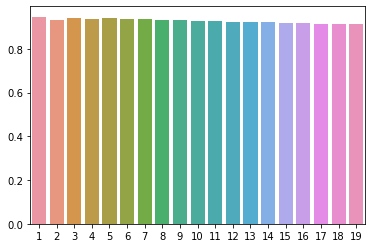

In [191]:
k_values = list(range(1,20))
accuracy_list = []
for k in k_values:
    knnmodel = KNNClassifier(k,metric = 'cosine')
    knnmodel.fit(Xtrain,Ytrain)
    ypred_knn = knnmodel.predict(Xtest)
    accuracy_list.append(accuracy(Ytest, ypred_knn))
    
# plotting k-value vs accuracy plot
sns.barplot(k_values, accuracy_list)

As we can see, k-value 1 has the highest accuracy. But for k=1, the model will be very sensitive to outliers. Hence, we will go with k=5 which has the second-highest accuracy. Let us observe the results with k=5.

As you can see, we got a performance boost here! Just by tweaking the hyperparameter ‘k’, our model’s accuracy bumped up by almost 3 percent.



In [227]:
knnmodel = KNNClassifier(5, metric = 'cosine')
knnmodel.fit(Xtrain,Ytrain)

In [228]:
ypred_knn = knnmodel.predict(Xtest)
ypred_knn

array([19, 11,  0, ..., 16, 24, 24])

In [229]:
acc = accuracy(Ytest, ypred_knn)
print('KNN Model accuracy= ', acc*100)

KNN Model accuracy=  93.975


In [241]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value


In [270]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [271]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(Xtrain,Ytrain.reshape(-1,1))
classifier.print_tree()

X_10 <= -1.6928896238884787 ? 0.021722301880229278
 left:X_8 <= -0.915105649043981 ? 0.3056702060758584
  left:X_12 <= 0.8376911587466098 ? 0.0454576539610553
    left:X_14 <= -1.4381526966217852 ? 0.014370129284619233
        left:13.0
        right:0.0
    right:X_0 <= -0.012309453615842696 ? 0.13265306122448983
        left:0.0
        right:12.0
  right:X_5 <= 0.050543322002432105 ? 0.18985891653009035
    left:X_14 <= 0.12008141632929248 ? 0.06880744937755805
        left:11.0
        right:18.0
    right:X_12 <= -1.3059476117805662 ? 0.15879393129472885
        left:9.0
        right:17.0
 right:X_6 <= 0.6448857411547162 ? 0.021133027054859754
  left:X_12 <= -0.877219857675131 ? 0.023561827202934094
    left:X_14 <= 0.12008141632929248 ? 0.12990753077526218
        left:8.0
        right:25.0
    right:X_14 <= -0.6590356401462464 ? 0.02716012052238692
        left:20.0
        right:23.0
  right:X_12 <= 0.8376911587466098 ? 0.081976995119316
    left:X_10 <= 0.5876082978292746 ? 

## Feature Selection

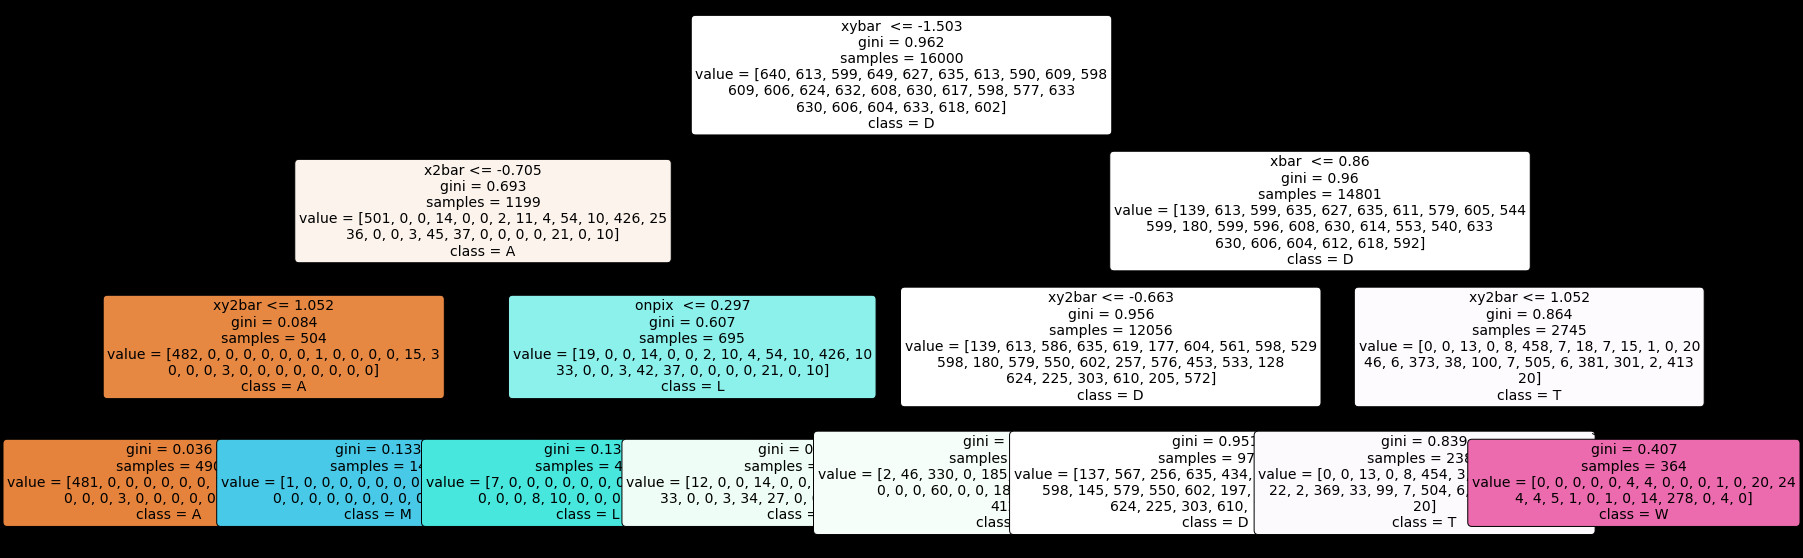

In [269]:
plt.figure(figsize=(30,10), facecolor ='k')
a = tree.plot_tree(classifier,
                   feature_names = feature_names,
                   class_names = order,
                   rounded = True,
                   filled = True,
                   fontsize=14)

plt.show()

In [286]:
dtFeatures = feature_names
dtFeatures.columns = ['dtFeatures','treelevel']
dtFeatures = dtFeatures.drop_duplicates()

(Index(['height', 'letter', 'onpix ', 'width ', 'x2bar', 'x2ybar', 'xbar ',
        'xbox ', 'xedge ', 'xedgey', 'xy2bar', 'xybar ', 'y2bar', 'ybar ',
        'ybox ', 'yedge ', 'yedgex'],
       dtype='object'),
 array([ 4,  0,  5,  3,  8, 11,  6,  1, 13, 14, 12, 10,  9,  7,  2, 15, 16]))